# Optimasi Rute Transportasi Umum Untuk Efisiensi Layanan & Pengurangan Emisi Karbon

> ## Topik:
Studi kasus mengenai **optimasi rute transportasi publik (KRL Jabodetabek)** menggunakan dua pendekatan algoritmik, yaitu **algoritma iteratif *Dijkstra*** dan **algoritma rekursif *DFS (Depth-First Search)***. Pada program ini akan dilakukan 2 kali simulasi, yaitu pada Rute KRL Jabodetabek (graf statis) dan graf dinamis untuk melihat perbandingan **input size (n).**

> ## Anggota Kelompok
- Nur Shabrina Muslim (103052300035)
- Farand Diy Dat Mahazalfaa (103052300050)



## 1. Langkah Awal: Menggambarkan Graf Rute KRL Jabodetabek menggunakan Networkx dan Matplotlib

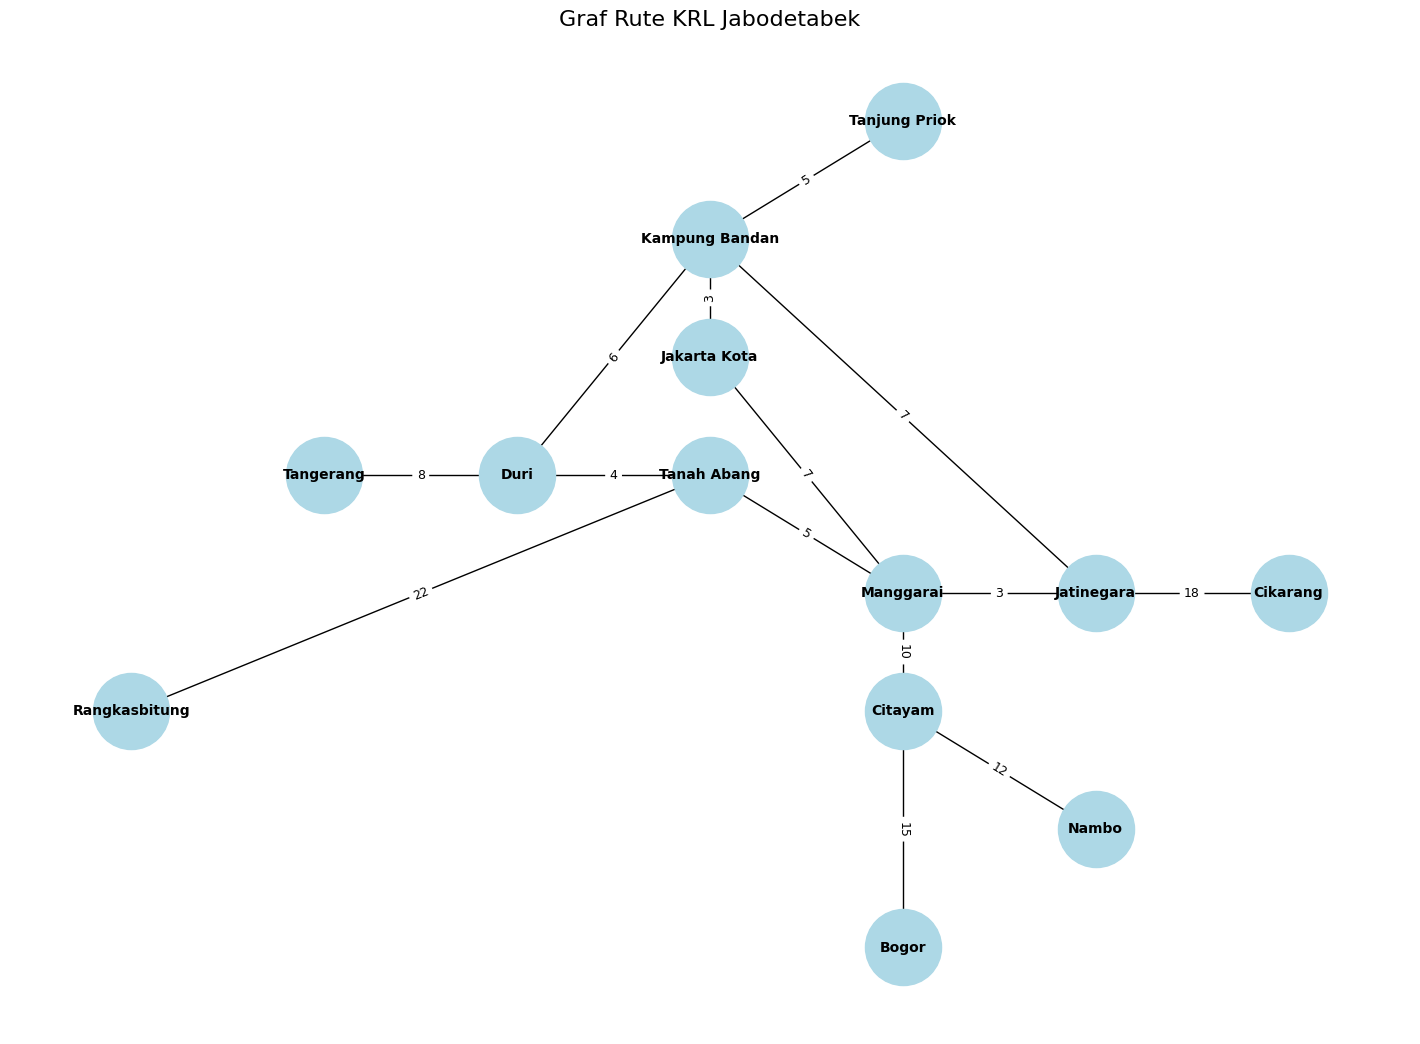

In [240]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat graf rute KRL
def create_static_krl_graph():
    G = nx.Graph()

    # Node (Stasiun utama/transit)
    stations = [
        "Tangerang", "Duri", "Tanah Abang", "Rangkasbitung",
        "Manggarai", "Jakarta Kota", "Jatinegara", "Cikarang",
        "Kampung Bandan", "Tanjung Priok", "Citayam", "Bogor", "Nambo"
    ]
    for station in stations:
        G.add_node(station)

    # Edge (Hubungan antar stasiun dengan jarak rata-rata)
    edges = [
        ("Tangerang", "Duri", 8),
        ("Duri", "Tanah Abang", 4),
        ("Tanah Abang", "Rangkasbitung", 22),
        ("Tanah Abang", "Manggarai", 5),
        ("Manggarai", "Jakarta Kota", 7),
        ("Manggarai", "Jatinegara", 3),
        ("Jatinegara", "Cikarang", 18),
        ("Jakarta Kota", "Kampung Bandan", 3),
        ("Duri", "Kampung Bandan", 6),
        ("Jatinegara", "Kampung Bandan", 7),
        ("Kampung Bandan", "Tanjung Priok", 5),
        ("Manggarai", "Citayam", 10),
        ("Citayam", "Bogor", 15),
        ("Citayam", "Nambo", 12)
    ]
    for edge in edges:
        G.add_edge(edge[0], edge[1], weight=edge[2])

    return G

def visualize_graph(G, pos, title="Graf Rute KRL Jabodetabek"):
    plt.figure(figsize=(14, 10))
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)
    plt.title(title, fontsize=16)
    plt.show()

# Visualisasi Rute KRL Jabodetabek
static_graph = create_static_krl_graph()
static_pos = {
    "Tangerang": (0, 5), "Duri": (1, 5), "Tanah Abang": (2, 5), "Rangkasbitung": (-1, 3),
    "Manggarai": (3, 4), "Jakarta Kota": (2, 6), "Jatinegara": (4, 4), "Cikarang": (5, 4),
    "Kampung Bandan": (2, 7), "Tanjung Priok": (3, 8), "Citayam": (3, 3), "Bogor": (3, 1), "Nambo": (4, 2)
}
visualize_graph(static_graph, static_pos)


>## Algoritma Iteratif Menggunakan Dijkstra Untuk Mencari Rute Terpendek

In [241]:
## Algoritma Iteratif: Dijkstra
def dijkstra(graph, start, end):
    shortest_paths = {start: (None, 0)}
    current_node = start
    visited = set()

    while current_node != end:
        visited.add(current_node)
        destinations = graph[current_node]
        weight_to_current_node = shortest_paths[current_node][1]

        for next_node, weight_dict in destinations.items():  # Changed here
            weight = weight_dict.get('weight', float('inf'))  # Fetch 'weight' from dictionary, handle missing values with infinity
            if next_node in visited:
                continue
            new_weight = weight_to_current_node + weight
            if next_node not in shortest_paths or new_weight < shortest_paths[next_node][1]:
                shortest_paths[next_node] = (current_node, new_weight)

        next_destinations = {node: shortest_paths[node] for node in shortest_paths if node not in visited}
        if not next_destinations:
            return None, float('inf')
        current_node = min(next_destinations, key=lambda k: next_destinations[k][1])

    path = []
    while current_node is not None:
        path.append(current_node)
        next_node = shortest_paths[current_node][0]
        current_node = next_node
    path.reverse()
    return path, shortest_paths[end][1]

>## Algoritma Rekursif Menggunakan DFS Untuk Mencari Semua Jalur

In [242]:
# Algoritma Rekursif: DFS untuk pencarian semua jalur
def dfs_paths(graph, start, end, path=None):
    if path is None:
        path = []
    path = path + [start]
    if start == end:
        return [path]
    if start not in graph:
        return []
    paths = []
    for node in graph[start]:
        if node not in path:
            new_paths = dfs_paths(graph, node, end, path)
            for p in new_paths:
                paths.append(p)
    return paths

>## Testing Algoritma Dijkstra (Iteratif) & DFS (Rekursif) pada Rute KRL Jabodetabek

=== Hasil Optimasi KRL Jabodetabek ===

Dijkstra (Iteratif): ['Duri', 'Tanah Abang', 'Manggarai', 'Jatinegara'] dengan biaya 12 dalam 0.000218 detik
DFS (Rekursif): 4 jalur ditemukan dalam 0.000159 detik
Jalur yang ditemukan (DFS):
  Jalur 1: Duri -> Tanah Abang -> Manggarai -> Jakarta Kota -> Kampung Bandan -> Jatinegara
  Jalur 2: Duri -> Tanah Abang -> Manggarai -> Jatinegara
  Jalur 3: Duri -> Kampung Bandan -> Jakarta Kota -> Manggarai -> Jatinegara
  Jalur 4: Duri -> Kampung Bandan -> Jatinegara




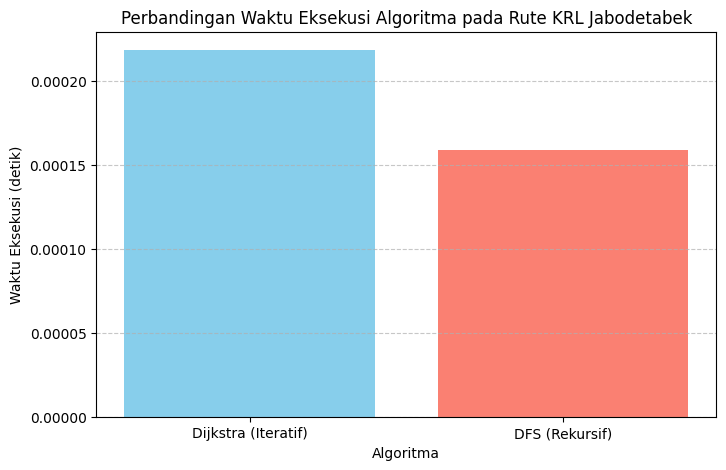

In [248]:
import matplotlib.pyplot as plt

## Testing Algoritma pada Rute KRL Jabodetabek
start_station = "Duri"
end_station = "Jatinegara"

# Dijkstra
start_time = time.time()
dijkstra_path, dijkstra_cost = dijkstra(nx.to_dict_of_dicts(static_graph), start_station, end_station)
dijkstra_time = time.time() - start_time

# DFS
start_time = time.time()
all_paths = dfs_paths(nx.to_dict_of_dicts(static_graph), start_station, end_station)
dfs_time = time.time() - start_time

# Print hasil
print("=== Hasil Optimasi KRL Jabodetabek ===\n")
print(f"Dijkstra (Iteratif): {dijkstra_path} dengan biaya {dijkstra_cost} dalam {dijkstra_time:.6f} detik")
print(f"DFS (Rekursif): {len(all_paths)} jalur ditemukan dalam {dfs_time:.6f} detik")
print("Jalur yang ditemukan (DFS):")
for i, path in enumerate(all_paths, 1):
    print(f"  Jalur {i}: {' -> '.join(path)}")

# Pemisah
print("\n")

# Visualisasi perbandingan waktu eksekusi
algorithms = ['Dijkstra (Iteratif)', 'DFS (Rekursif)']
times = [dijkstra_time, dfs_time]

plt.figure(figsize=(8, 5))
plt.bar(algorithms, times, color=['skyblue', 'salmon'])
plt.xlabel("Algoritma")
plt.ylabel("Waktu Eksekusi (detik)")
plt.title("Perbandingan Waktu Eksekusi Algoritma pada Rute KRL Jabodetabek")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 2. Simulasi Graf Dinamis untuk Mengetahui Kompleksitas Waktu dari Input Size N

<ipython-input-291-2c1a65fdaf69>:19: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(


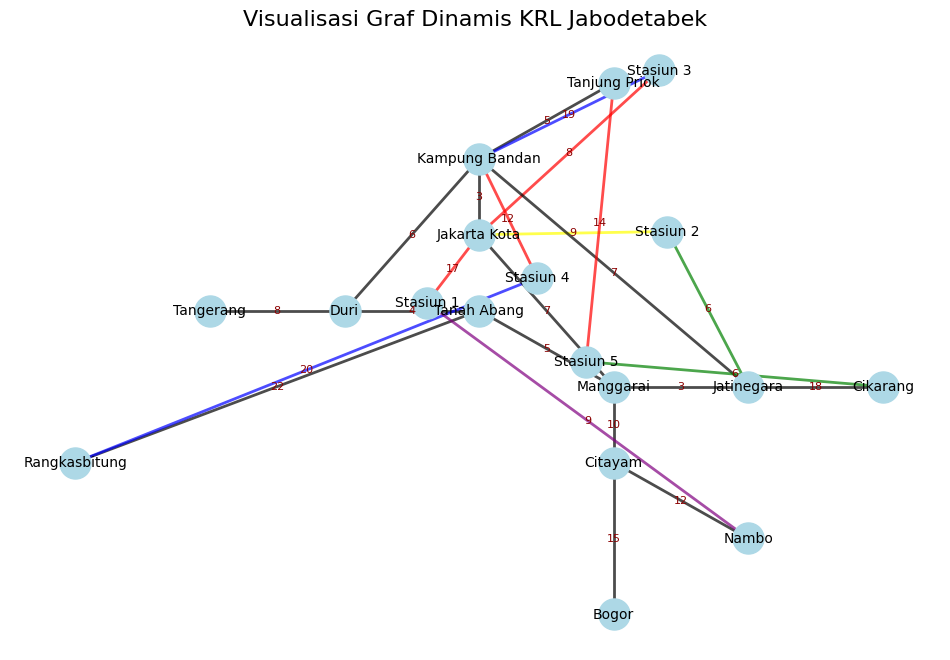

In [291]:
# Membuat dan Memvisualisasikan Graf Dinamis
new_stations_count = 5  # Jumlah node dinamis yang ditambahkan
dynamic_graph, dynamic_pos = create_dynamic_krl_graph(static_graph, new_stations_count)

# Fungsi Visualisasi
def visualize_graph_with_edges(graph, positions, title="Graf Dinamis KRL"):
    plt.figure(figsize=(12, 8))
    plt.title(title, fontsize=16)

    # Gambar node
    nx.draw_networkx_nodes(graph, positions, node_size=500, node_color="lightblue")
    nx.draw_networkx_labels(graph, positions, font_size=10, font_color="black")

    # Gambar edges
    edges = graph.edges(data=True)
    for u, v, data in edges:
        weight = data.get('weight', 1)
        color = data.get('color', 'black')
        nx.draw_networkx_edges(
            graph, positions,
            edgelist=[(u, v)],
            width=2,
            edge_color=color,
            alpha=0.7,
            connectionstyle="arc3,rad=0.1"  # Memberikan lengkungan pada edge
        )
        # Tambahkan label untuk bobot edge
        edge_midpoint = (
            (positions[u][0] + positions[v][0]) / 2,
            (positions[u][1] + positions[v][1]) / 2,
        )
        plt.text(
            edge_midpoint[0], edge_midpoint[1],
            str(weight),
            fontsize=8, color="darkred",
            horizontalalignment='center', verticalalignment='center'
        )

    plt.axis("off")
    plt.show()

# Visualisasi Graf Dinamis
visualize_graph_with_edges(dynamic_graph, dynamic_pos, title="Visualisasi Graf Dinamis KRL Jabodetabek")


> ## Simulasi Algoritma Dijkstra & DFS Pada Graf Dinamis

In [292]:
# Testing Algoritma pada Graf Dinamis
start_station = random.choice((list(dynamic_graph.nodes())))
reachable_nodes = nx.node_connected_component(dynamic_graph.to_undirected(), start_station)
end_station = random.choice([node for node in reachable_nodes if node != start_station])

# Dijkstra
start_time = time.time()
dijkstra_path, dijkstra_cost = dijkstra(nx.to_dict_of_dicts(dynamic_graph), start_station, end_station)
dijkstra_time = time.time() - start_time

# DFS
start_time = time.time()
all_paths = dfs_paths(nx.to_dict_of_dicts(dynamic_graph), start_station, end_station)
dfs_time = time.time() - start_time

# Print hasil
print("=== Hasil Optimasi Graf Dinamis ===")
print(f"Stasiun Awal: {start_station}")
print(f"Stasiun Akhir: {end_station}\n")

print("Dijkstra (Iteratif):")
print(f"Rute Terbaik: {' -> '.join(dijkstra_path)}")
print(f"Biaya Total: {dijkstra_cost}")
print(f"Waktu Eksekusi: {dijkstra_time:.6f} detik\n")

print("DFS (Rekursif):")
print(f"Total Jalur yang Ditemukan: {len(all_paths)}")
for i, path in enumerate(all_paths[:5], 1):  # Menampilkan maksimal 5 jalur
    print(f"Jalur {i}: {' -> '.join(path)}")
print(f"Waktu Eksekusi: {dfs_time:.6f} detik")


=== Hasil Optimasi Graf Dinamis ===
Stasiun Awal: Bogor
Stasiun Akhir: Duri

Dijkstra (Iteratif):
Rute Terbaik: Bogor -> Citayam -> Manggarai -> Tanah Abang -> Duri
Biaya Total: 34
Waktu Eksekusi: 0.000221 detik

DFS (Rekursif):
Total Jalur yang Ditemukan: 38
Jalur 1: Bogor -> Citayam -> Manggarai -> Tanah Abang -> Duri
Jalur 2: Bogor -> Citayam -> Manggarai -> Tanah Abang -> Rangkasbitung -> Stasiun 4 -> Kampung Bandan -> Duri
Jalur 3: Bogor -> Citayam -> Manggarai -> Jakarta Kota -> Kampung Bandan -> Duri
Jalur 4: Bogor -> Citayam -> Manggarai -> Jakarta Kota -> Kampung Bandan -> Stasiun 4 -> Rangkasbitung -> Tanah Abang -> Duri
Jalur 5: Bogor -> Citayam -> Manggarai -> Jakarta Kota -> Stasiun 2 -> Jatinegara -> Cikarang -> Stasiun 5 -> Tanjung Priok -> Kampung Bandan -> Duri
Waktu Eksekusi: 0.000653 detik


>## Analisis Kompleksitas Algoritma Iteratif (Dijkstra) dan Rekursif (DFS)


=== Graf Dinamis dengan 0 Node Tambahan ===
Jumlah Node: 13, Jumlah Edge: 14
Stasiun Awal: Citayam, Stasiun Akhir: Jatinegara
Dijkstra: Rute Terbaik: Citayam -> Manggarai -> Jatinegara, Biaya: 13, Waktu Eksekusi: 0.000062 detik
DFS: Total Jalur Ditemukan: 3, Waktu Eksekusi: 0.000057 detik
Contoh Jalur DFS:
  Jalur 1: Citayam -> Manggarai -> Tanah Abang -> Duri -> Kampung Bandan -> Jatinegara
  Jalur 2: Citayam -> Manggarai -> Jakarta Kota -> Kampung Bandan -> Jatinegara
  Jalur 3: Citayam -> Manggarai -> Jatinegara

=== Graf Dinamis dengan 5 Node Tambahan ===
Jumlah Node: 18, Jumlah Edge: 24
Stasiun Awal: Tangerang, Stasiun Akhir: Jatinegara
Dijkstra: Rute Terbaik: Tangerang -> Duri -> Tanah Abang -> Manggarai -> Jatinegara, Biaya: 20, Waktu Eksekusi: 0.000085 detik
DFS: Total Jalur Ditemukan: 23, Waktu Eksekusi: 0.000157 detik
Contoh Jalur DFS:
  Jalur 1: Tangerang -> Duri -> Tanah Abang -> Rangkasbitung -> Stasiun 2 -> Nambo -> Citayam -> Manggarai -> Jakarta Kota -> Kampung Bandan 

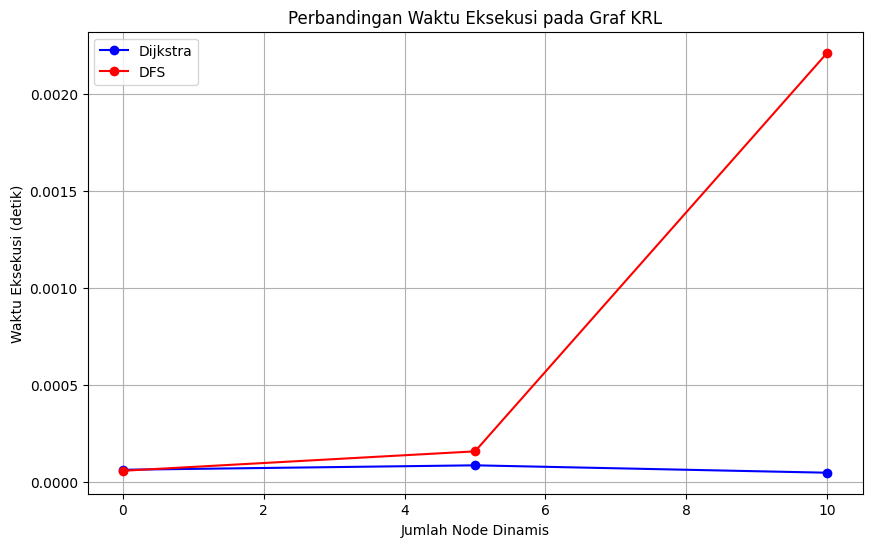

In [293]:
# Input size sebagai jumlah node dinamis yang ditambahkan
input_sizes = [0, 5, 10]  # Node tambahan
dijkstra_times = []
dfs_times = []

for size in input_sizes:
    # Buat graf dinamis berdasarkan graf KRL statis dengan tambahan node
    dynamic_graph, _ = create_dynamic_krl_graph(static_graph, size)

    # Tentukan start dan end station
    start_station = random.choice((list(dynamic_graph.nodes())))
    reachable_nodes = nx.node_connected_component(dynamic_graph.to_undirected(), start_station)
    end_station = random.choice([node for node in reachable_nodes if node != start_station])

    # Ukuran graf
    num_nodes = dynamic_graph.number_of_nodes()
    num_edges = dynamic_graph.number_of_edges()
    print(f"\n=== Graf Dinamis dengan {size} Node Tambahan ===")
    print(f"Jumlah Node: {num_nodes}, Jumlah Edge: {num_edges}")
    print(f"Stasiun Awal: {start_station}, Stasiun Akhir: {end_station}")

    # Dijkstra
    start_time = time.time()
    dijkstra_path, dijkstra_cost = dijkstra(nx.to_dict_of_dicts(dynamic_graph), start_station, end_station)
    dijkstra_time = time.time() - start_time
    dijkstra_times.append(dijkstra_time)
    print(f"Dijkstra: Rute Terbaik: {' -> '.join(dijkstra_path)}, Biaya: {dijkstra_cost}, Waktu Eksekusi: {dijkstra_time:.6f} detik")

    # DFS
    start_time = time.time()
    all_paths = list(dfs_paths(nx.to_dict_of_dicts(dynamic_graph), start_station, end_station))
    dfs_time = time.time() - start_time
    dfs_times.append(dfs_time)
    print(f"DFS: Total Jalur Ditemukan: {len(all_paths)}, Waktu Eksekusi: {dfs_time:.6f} detik")
    if len(all_paths) > 0:
        print("Contoh Jalur DFS:")
        for i, path in enumerate(all_paths[:3], 1):  # Tampilkan maksimal 3 jalur
            print(f"  Jalur {i}: {' -> '.join(path)}")

# Visualisasi Hasil
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, dijkstra_times, label='Dijkstra', marker='o', color='blue')
plt.plot(input_sizes, dfs_times, label='DFS', marker='o', color='red')
plt.xlabel('Jumlah Node Dinamis')
plt.ylabel('Waktu Eksekusi (detik)')
plt.title('Perbandingan Waktu Eksekusi pada Graf KRL')
plt.legend()
plt.grid()
plt.show()
